# Constraints on the tensor-to-scalar ratio by internal delensing using Planck + LiteBIRD

In [1]:
import numpy as np
import lensquest
import pickle as pl
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

plt.rcParams.update({"text.usetex": True, "font.family": "Helvetica"})
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['lines.linewidth'] = 2.0

# Set global font sizes
mpl.rcParams['axes.labelsize'] = 24         # x/y label size
mpl.rcParams['axes.titlesize'] = 18         # subplot title size
mpl.rcParams['xtick.labelsize'] = 18        # tick labels
mpl.rcParams['ytick.labelsize'] = 18
mpl.rcParams['legend.fontsize'] = 20        # legend text
mpl.rcParams['figure.titlesize'] = 20       # optional for fig.suptitle()

from astropy.io import ascii
import os

# CHANGE THIS PATH IN ORDER TO MATCH THE PATH OF YOUR PACKAGE
PATH_PACKAGE = '/home/miguel/Desktop/PlanckBIRD-lens'

### Load arrays of theory CMB unlensed and lensed Cls (scalar and tensor).
Unlensed Cls are not used for now. The Cls should not be multiplied by any factors and should not have units.  

In [2]:
lmax = 2048
T_CMB = 2.7255e6  # in muK
input_dir = f'{PATH_PACKAGE}/input'
fileUnlensedCls = 'base_2018_plikHM_TTTEEE_lowl_lowE_lensing_cl.dat'
fileLensedCls = 'base_2018_plikHM_TTTEEE_lowl_lowE_lensing_cl_lensed.dat'
fileTensor = 'base_2018_plikHM_TTTEEE_lowl_lowE_lensing_Scalar_Tensor_1e-3clt.dat'
# The column names used in the angular power spectra files are:
# colnames = ['1:l', '2:TT', '3:EE', '4:TE', '5:BB', '6:phiphi', '7:TPhi', '8:Ephi']
unlenCls = ascii.read(f'{input_dir}/{fileUnlensedCls}', format="commented_header", header_start=10).as_array()
lensCls = ascii.read(f'{input_dir}/{fileLensedCls}', format="commented_header", header_start=10).as_array()
tensorCls = ascii.read(f'{input_dir}/{fileTensor}', format="commented_header", header_start=9).as_array()

# We divide by the normalization factor given by CLASS code. We skip l=0 because it leads to an
#  indeterminate form 0/0
factor1 = 2 * np.pi / (unlenCls['1:l'][1:] * (unlenCls['1:l'][1:] + 1))
factor2 = 2 * np.pi / (lensCls['1:l'][1:] * (lensCls['1:l'][1:] + 1))
factor3 = 2 * np.pi / (tensorCls['1:l'] * (tensorCls['1:l'] + 1))
for name in unlenCls.dtype.names[1:]:
    unlenCls[name][1:] = factor1 * unlenCls[name][1:]
    lensCls[name][1:] = factor2 * lensCls[name][1:]
    
for name in tensorCls.dtype.names[1:]:
    tensorCls[name] = factor3 * tensorCls[name]

# Theoretical lensed power spectra.
lensedTheoryCls = np.array([lensCls['2:TT'][:lmax + 1] * T_CMB ** 2,
                                 lensCls['3:EE'][:lmax + 1] * T_CMB ** 2,
                                 lensCls['5:BB'][:lmax + 1] * T_CMB ** 2,
                                 lensCls['4:TE'][:lmax + 1] * T_CMB ** 2])

### Load the observed Cls for the different foreground scenarios.
* Signal and noise Cls
* Signal, noise and residual foregrounds (corrected by the mask fraction)

In [3]:
directory_HILC = f'{PATH_PACKAGE}/data/mean_spectra_HILC'
directory_filt = f'{PATH_PACKAGE}/data/mean_spectra_filtered'
# LiteBIRD no foregrounds 
sn_L_no_fg = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_no_fg_chance_False_mask_False_400.pkl', 'rb'))
map_L_no_fg = pl.load(open(f'{directory_filt}/mean_cls_map_no_fg_LiteBIRD_fsky_0.8_400.pkl', 'rb'))
# LiteBIRD s1d1
sn_L_s1_d1 = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_s1_d1_f1_a1_co1_chance_True_mask_True_0.97_400.pkl', 'rb'))
map_L_s1_d1 = pl.load(open(f'{directory_filt}/mean_cls_map_s1_d1_f1_a1_co1_LiteBIRD_fsky_0.8_400.pkl', 'rb'))
# LiteBIRD s5d10
sn_L_s5_d10 = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_s5_d10_a1_f1_co3_chance_True_mask_True_0.97_400.pkl', 'rb'))
map_L_s5_d10 = pl.load(open(f'{directory_filt}/mean_cls_map_s5_d10_a1_f1_co3_LiteBIRD_fsky_0.8_400.pkl', 'rb'))
# LiteBIRD + Planck no foregrounds
sn_LP_no_fg = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_Planck_no_fg_chance_False_mask_False_400.pkl', 'rb'))
map_LP_no_fg = pl.load(open(f'{directory_filt}/mean_cls_map_no_fg_LiteBIRD_Planck_fsky_0.8_400.pkl', 'rb'))
# LiteBIRD + Planck s1d1
sn_LP_s1_d1 = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_Planck_s1_d1_f1_a1_co1_chance_True_mask_True_0.97_400.pkl', 'rb'))
map_LP_s1_d1 = pl.load(open(f'{directory_filt}/mean_cls_map_s1_d1_f1_a1_co1_LiteBIRD_Planck_fsky_0.8_400.pkl', 'rb'))
# LiteBIRD + Planck s5d10
sn_LP_s5_d10 = pl.load(open(f'{directory_HILC}/mean_signal_noise_LiteBIRD_Planck_s5_d10_a1_f1_co3_chance_True_mask_True_0.97_400.pkl', 'rb'))
map_LP_s5_d10 = pl.load(open(f'{directory_filt}/mean_cls_map_s5_d10_a1_f1_co3_LiteBIRD_Planck_fsky_0.8_400.pkl', 'rb'))

### Calculate the N0 bias 

In [4]:
lmin = 2
lmax_del = 190
lmax_L = 1000
lmax_P = 2048
spectra = ['TT', 'EE', 'TE', 'TB', 'EB']
directory = f'{PATH_PACKAGE}/data/N0_delensing'

if os.path.isfile(f'{directory}/N0_LP_no_fg_B_cut.pkl'):
    N0_L_no_fg_B_cut = pl.load(open(f'{directory}/N0_L_no_fg_B_cut.pkl',"rb"))
    N0_L_s1_d1_B_cut = pl.load(open(f'{directory}/N0_L_s1_d1_B_cut.pkl',"rb"))
    N0_L_s5_d10_B_cut = pl.load(open(f'{directory}/N0_L_s5_d10_B_cut.pkl',"rb")) 
else:                            
    # LiteBIRD no foregrounds
    sn_L_no_fg_B_cut = sn_L_no_fg.copy()
    sn_L_no_fg_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_L_no_fg_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_L_no_fg, sn_L_no_fg_B_cut, lmin=lmin, lmax=lmax_L, 
                                            lminCMB=lmin, lmaxCMB=lmax_L, rdcl=map_L_no_fg, bias=True)[1]
    N0_MV_L_no_fg, weight = lensquest.pstools.getweights(N0_L_no_fg_B_cut, spectra)
    # LiteBIRD s1d1
    sn_L_s1_d1_B_cut = sn_L_s1_d1.copy()
    sn_L_s1_d1_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_L_s1_d1_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_L_s1_d1, sn_L_s1_d1_B_cut, lmin=lmin, lmax=lmax_L, 
                                            lminCMB=lmin, lmaxCMB=lmax_L, rdcl=map_L_s1_d1, bias=True)[1]
    N0_MV_L_s1_d1, weight = lensquest.pstools.getweights(N0_L_s1_d1_B_cut, spectra)
    # LiteBIRD s5d10
    sn_L_s5_d10_B_cut = sn_L_s5_d10.copy()
    sn_L_s5_d10_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_L_s5_d10_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_L_s5_d10, sn_L_s5_d10_B_cut, lmin=lmin, lmax=lmax_L, 
                                            lminCMB=lmin, lmaxCMB=lmax_L, rdcl=map_L_s5_d10, bias=True)[1]
    N0_MV_L_s5_d10, weight = lensquest.pstools.getweights(N0_L_s5_d10_B_cut, spectra)
    N0_L_no_fg_B_cut['MVMV'] = N0_MV_L_no_fg
    N0_L_s1_d1_B_cut['MVMV'] = N0_MV_L_s1_d1
    N0_L_s5_d10_B_cut['MVMV'] = N0_MV_L_s5_d10
    pl.dump(N0_L_no_fg_B_cut, open(f'{directory}/N0_L_no_fg_B_cut.pkl',"wb"))
    pl.dump(N0_L_s1_d1_B_cut, open(f'{directory}/N0_L_s1_d1_B_cut.pkl',"wb"))
    pl.dump(N0_L_s5_d10_B_cut, open(f'{directory}/N0_L_s5_d10_B_cut.pkl',"wb"))

In [5]:
if os.path.isfile(f'{directory}/N0_LP_no_fg_B_cut.pkl'):
    N0_LP_no_fg_B_cut = pl.load(open(f'{directory}/N0_LP_no_fg_B_cut.pkl',"rb"))
    N0_LP_s1_d1_B_cut = pl.load(open(f'{directory}/N0_LP_s1_d1_B_cut.pkl',"rb"))
    N0_LP_s5_d10_B_cut = pl.load(open(f'{directory}/N0_LP_s5_d10_B_cut.pkl',"rb")) 
else:                            
    # LiteBIRD + Planck no foregrounds
    sn_LP_no_fg_B_cut = sn_LP_no_fg.copy()
    sn_LP_no_fg_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_LP_no_fg_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_LP_no_fg, sn_LP_no_fg_B_cut, lmin=lmin, lmax=lmax_P, 
                                            lminCMB=lmin, lmaxCMB=lmax_P, rdcl=map_LP_no_fg, bias=True)[1]
    N0_MV_LP_no_fg, weight = lensquest.pstools.getweights(N0_LP_no_fg_B_cut, spectra)
    # LiteBIRD + Planck s1d1
    sn_LP_s1_d1_B_cut = sn_LP_s1_d1.copy()
    sn_LP_s1_d1_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_LP_s1_d1_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_LP_s1_d1, sn_LP_s1_d1_B_cut, lmin=lmin, lmax=lmax_P, 
                                            lminCMB=lmin, lmaxCMB=lmax_P, rdcl=map_LP_s1_d1, bias=True)[1]
    N0_MV_LP_s1_d1, weight = lensquest.pstools.getweights(N0_LP_s1_d1_B_cut, spectra)
    # LiteBIRD + Planck s5d10
    sn_LP_s5_d10_B_cut = sn_LP_s5_d10.copy()
    sn_LP_s5_d10_B_cut[2][:lmax_del+1] = 1e10*np.ones(lmax_del+1)
    N0_LP_s5_d10_B_cut = lensquest.quest_norm(lensedTheoryCls[:lmax + 1], map_LP_s5_d10, sn_LP_s5_d10_B_cut, lmin=lmin, lmax=lmax_P, 
                                            lminCMB=lmin, lmaxCMB=lmax_P, rdcl=map_LP_s5_d10, bias=True)[1]
    N0_MV_LP_s5_d10, weight = lensquest.pstools.getweights(N0_LP_s5_d10_B_cut, spectra)
    N0_LP_no_fg_B_cut['MVMV'] = N0_MV_LP_no_fg
    N0_LP_s1_d1_B_cut['MVMV'] = N0_MV_LP_s1_d1
    N0_LP_s5_d10_B_cut['MVMV'] = N0_MV_LP_s5_d10
    pl.dump(N0_LP_no_fg_B_cut, open(f'{directory}/N0_LP_no_fg_B_cut.pkl',"wb"))
    pl.dump(N0_LP_s1_d1_B_cut, open(f'{directory}/N0_LP_s1_d1_B_cut.pkl',"wb"))
    pl.dump(N0_LP_s5_d10_B_cut, open(f'{directory}/N0_LP_s5_d10_B_cut.pkl',"wb"))

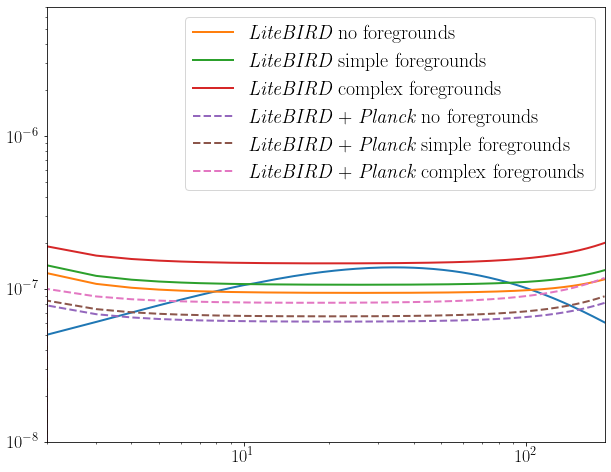

In [6]:
L = np.arange(lmax_del+1)
Lfac = (L*(L+1.))**2/(2*np.pi)
plt.figure(figsize=(10, 8))
plt.plot(Lfac*lensCls['6:phiphi'][:lmax_del + 1])
plt.plot(Lfac*N0_L_no_fg_B_cut['MVMV'][:lmax_del + 1], label='$\\textit{LiteBIRD}$ no foregrounds')
plt.plot(Lfac*N0_L_s1_d1_B_cut['MVMV'][:lmax_del + 1], label='$\\textit{LiteBIRD}$ simple foregrounds')
plt.plot(Lfac*N0_L_s5_d10_B_cut['MVMV'][:lmax_del + 1], label='$\\textit{LiteBIRD}$ complex foregrounds')
plt.plot(Lfac*N0_LP_no_fg_B_cut['MVMV'][:lmax_del + 1], linestyle='dashed', label='$\\textit{LiteBIRD}$ + $\\textit{Planck}$ no foregrounds')
plt.plot(Lfac*N0_LP_s1_d1_B_cut['MVMV'][:lmax_del + 1], linestyle='dashed', label='$\\textit{LiteBIRD}$ + $\\textit{Planck}$ simple foregrounds')
plt.plot(Lfac*N0_LP_s5_d10_B_cut['MVMV'][:lmax_del + 1], linestyle='dashed', label='$\\textit{LiteBIRD}$ + $\\textit{Planck}$ complex foregrounds')
plt.legend()
plt.xlim(2, lmax_del)
plt.ylim([1e-8, 7e-6])
plt.semilogx()
plt.semilogy()
plt.show()

## Calculate the delensing efficiency

Test that the delensing efficiency estimation is working fine.

In [7]:
def delensing_efficiency(obs_cls, N0, lmax):
    # Wiener filtered cl^EE
    WE = lensedTheoryCls[1, :lmax + 1]/obs_cls
    WE[np.isnan(WE)] = 0
    # Wiener filtered cl^phiphi
    Wp = lensCls['6:phiphi'][:lmax + 1]/(lensCls['6:phiphi'][:lmax + 1]+N0)
    Wp[np.isnan(Wp)] = 0
    # Input cls
    clEE = lensedTheoryCls[1, :lmax + 1]*WE
    clphiphi = lensCls['6:phiphi'][:lmax + 1]*Wp
    clBB_template = lensquest.lensbb(clEE, clphiphi, lmax=lmax_del, even=False)
    clBB = lensedTheoryCls[2, :lmax_del + 1]
    Alens = (clBB-clBB_template)/clBB
    Alens[np.isnan(Alens)] = 0
    return Alens

In [8]:
# LiteBIRD EB
Alens_L_EB_no_fg = delensing_efficiency(map_L_no_fg[1], N0_L_no_fg_B_cut['EBEB'], lmax_L)
Alens_L_EB_s1_d1 = delensing_efficiency(map_L_s1_d1[1], N0_L_s1_d1_B_cut['EBEB'], lmax_L)
Alens_L_EB_s5_d10 = delensing_efficiency(map_L_s5_d10[1], N0_L_s5_d10_B_cut['EBEB'], lmax_L)
# LiteBIRD MV
Alens_L_MV_no_fg = delensing_efficiency(map_L_no_fg[1], N0_L_no_fg_B_cut['MVMV'], lmax_L)
Alens_L_MV_s1_d1 = delensing_efficiency(map_L_s1_d1[1], N0_L_s1_d1_B_cut['MVMV'], lmax_L)
Alens_L_MV_s5_d10 = delensing_efficiency(map_L_s5_d10[1], N0_L_s5_d10_B_cut['MVMV'], lmax_L)
# LiteBIRD + Planck MV
Alens_LP_MV_no_fg = delensing_efficiency(map_LP_no_fg[1], N0_LP_no_fg_B_cut['MVMV'], lmax_P)
Alens_LP_MV_s1_d1 = delensing_efficiency(map_LP_s1_d1[1], N0_LP_s1_d1_B_cut['MVMV'], lmax_P)
Alens_LP_MV_s5_d10 = delensing_efficiency(map_LP_s5_d10[1], N0_LP_s5_d10_B_cut['MVMV'], lmax_P)

/tmp/ipykernel_15446/1534114748.py:3: RuntimeWarning: invalid value encountered in divide
  WE = lensedTheoryCls[1, :lmax + 1]/obs_cls
/tmp/ipykernel_15446/1534114748.py:6: RuntimeWarning: invalid value encountered in divide
  Wp = lensCls['6:phiphi'][:lmax + 1]/(lensCls['6:phiphi'][:lmax + 1]+N0)
/tmp/ipykernel_15446/1534114748.py:13: RuntimeWarning: invalid value encountered in divide
  Alens = (clBB-clBB_template)/clBB


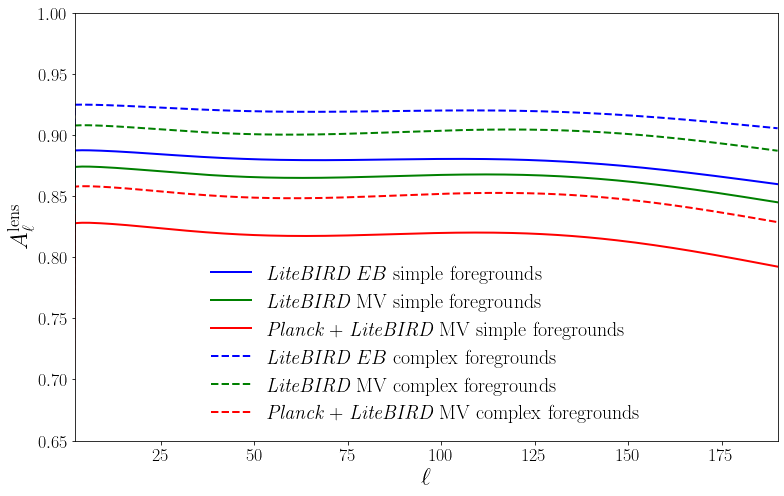

In [9]:
directory_plots = f'{PATH_PACKAGE}/notebooks/plots'
plt.figure(figsize=(11, 7))
# plt.title('$\\textit{LiteBIRD}$', fontsize=18)
# LiteBIRD EB
# plt.plot(Alens_L_EB_no_fg, label = 'EB no fg', c='darkorange')
plt.plot(Alens_L_EB_s1_d1, label = '$\\textit{LiteBIRD}$ $EB$ simple foregrounds', c='blue')
plt.plot(Alens_L_MV_s1_d1, label = '$\\textit{LiteBIRD}$ MV simple foregrounds', c='green')
plt.plot(Alens_LP_MV_s1_d1, label = '$\\textit{Planck}$ + $\\textit{LiteBIRD}$ MV simple foregrounds', c='red')

# LiteBIRD MV
# plt.plot(Alens_L_MV_no_fg, linestyle='dashed', label = 'MV no fg', c='darkorange')
plt.plot(Alens_L_EB_s5_d10, linestyle='dashed', label = '$\\textit{LiteBIRD}$ $EB$ complex foregrounds', c='blue')
plt.plot(Alens_L_MV_s5_d10, linestyle='dashed', label = '$\\textit{LiteBIRD}$ MV complex foregrounds', c='green')
plt.plot(Alens_LP_MV_s5_d10, linestyle='dashed', label = '$\\textit{Planck}$ + $\\textit{LiteBIRD}$ MV complex foregrounds', c='red')

plt.tick_params(axis='both', which='major')
plt.tick_params(axis='both', which='minor')
plt.xlim([2.05, lmax_del])
plt.ylim([0.65, 1])
plt.xlabel(r'$\ell$')
plt.ylabel(r'$A^{\rm lens}_\ell$')
plt.legend(ncol=1, loc='lower center', frameon=False)
plt.tight_layout()
plt.savefig(f'{directory_plots}/delensing_efficiency_with_fg.pdf')

In [10]:
np.mean(Alens_LP_MV_s1_d1)

0.8077349044447859

In [11]:
np.mean(Alens_L_EB_s5_d10)

0.9085392000421914

In [12]:
(1-np.mean(Alens_L_MV_s1_d1)/np.mean(Alens_L_EB_s1_d1))*100

1.536650232661696

In [13]:
(1-np.mean(Alens_LP_MV_s1_d1)/np.mean(Alens_L_EB_s1_d1))*100

7.017394322714798

### Constraints on the tensor-to-scalar ratio, $r$

In [14]:
# Load the power spectrum variables
Cl_tensor = np.concatenate((np.zeros(2), tensorCls['4:BB'][:lmax + 1]))
Cl_scalar = lensedTheoryCls[2]
# Nl_PTEP = np.array(data['Mean_of_the_noisy_sims(FG_and_noise_no_CMB)'])
Nl_s1d1 = map_L_s1_d1[2]-Cl_scalar[:1001]
Nl_s5d10 = map_L_s5_d10[2]-Cl_scalar[:1001]

In [15]:
# Using LiteBIRD's PTEP likelihood
def likelihood(Al, r_inp, Cl_scalar, Cl_tensor, Nl, lmax, fsky, r_class=1e-3, n_values=10000, r_max=1.5e-2):
    r_array = np.linspace(0, r_max, n_values)
    sigma_r = r_max/n_values
    # Power spectra components
    len_tensor = len(tensorCls['4:BB'])
    Cl_tensor = Cl_tensor[:lmax+1]
    Cl_scalar = Cl_scalar[:lmax+1]
    Nl = Nl[:lmax + 1]

    # Observed, theory and residual noise and foregrounds power spectra.
    CBB_obs = (r_inp/r_class)*Cl_tensor + Al*Cl_scalar + Nl
    L = np.arange(lmax+1)
    CBB_theory = np.zeros((n_values, lmax+1))
    loglike = np.zeros(n_values)
    for i in range(n_values):
        CBB_theory[i] = (r_array[i]/r_class)*Cl_tensor + Al*Cl_scalar + Nl
        q = CBB_obs/CBB_theory[i]
        q[0] = 1
        q[1] = 1
        loglike[i] = fsky*np.sum((2*L+1)*(q-np.log(q)-1))
    return r_array, np.exp(-loglike/2)

## Constraints on $r$ using s1d1 residuals over 80 % of the sky

In [16]:
r_max = 5e-2
n_values = 50000
fsky = 0.8
r_inp = 5e-3
Nl = Nl_s1d1
name = f'Nl_s1d1_fsky_{fsky}'
r_array, likelihood_no_delens_r_0_005 = likelihood(1.0, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_L_EB_delens_r_0_005 = likelihood(Alens_L_EB_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_L_MV_delens_r_0_005 = likelihood(Alens_L_MV_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_LP_MV_delens_r_0_005 = likelihood(Alens_LP_MV_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_inp = 0
r_array, likelihood_no_delens_r_0 = likelihood(1.0, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_L_EB_delens_r_0 = likelihood(Alens_L_EB_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_L_MV_delens_r_0 = likelihood(Alens_L_MV_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)
r_array, likelihood_LP_MV_delens_r_0 = likelihood(Alens_LP_MV_s1_d1, r_inp, Cl_scalar, Cl_tensor, Nl, lmax_del, fsky, n_values=n_values, r_max=r_max)

/tmp/ipykernel_15446/1194661079.py:18: RuntimeWarning: invalid value encountered in divide
  q = CBB_obs/CBB_theory[i]


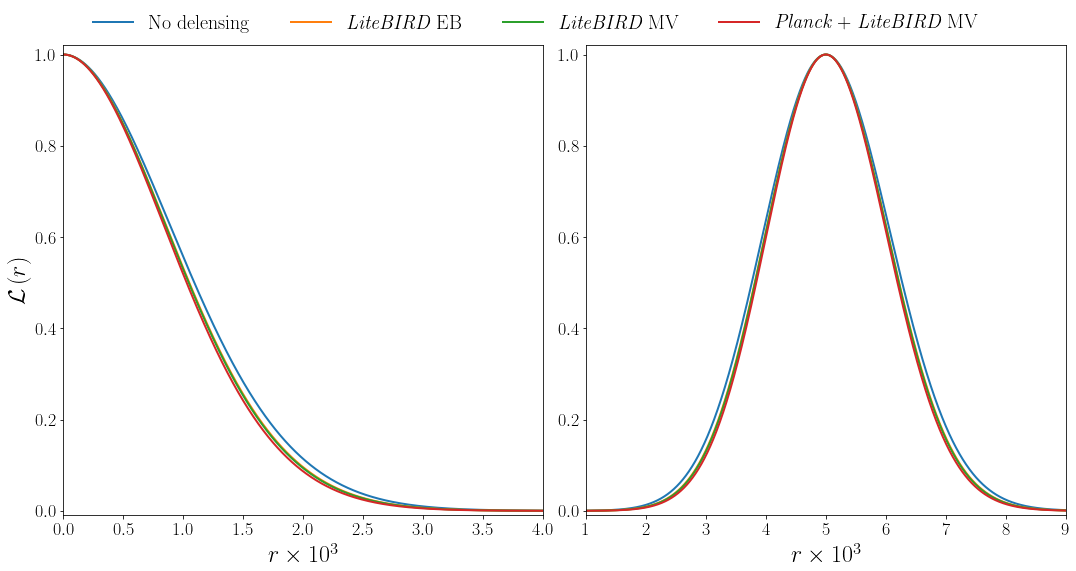

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))
handles = []
labels = []
# First plot
axes[0].plot(r_array * 1e3, likelihood_no_delens_r_0, label='No delensing')
axes[0].plot(r_array * 1e3, likelihood_L_EB_delens_r_0, label='$\\textit{LiteBIRD}$ EB')
axes[0].plot(r_array * 1e3, likelihood_L_MV_delens_r_0, label='$\\textit{LiteBIRD}$ MV')
axes[0].plot(r_array * 1e3, likelihood_LP_MV_delens_r_0, label='$\\textit{Planck}$ + $\\textit{LiteBIRD}$ MV')

h, l = axes[0].get_legend_handles_labels()
handles.extend(h)
labels.extend(l)
text_only_handles = [
Line2D([0], [0], linestyle='none', marker='', linewidth=0, color='none'),
Line2D([0], [0], linestyle='none', marker='', linewidth=0, color='none')
]

# axes[0].legend(text_only_handles, [r"$r^{\mathrm{fid}}=0$"], loc='upper right', frameon=False,
#           handlelength=0, handletextpad=0.3, borderaxespad=0.4, fontsize=24)

# Adjust layout for better spacing
fig.legend(handles, labels, loc='upper center', ncol=7, bbox_to_anchor=(0.5, 1.07), frameon=False)

axes[0].set_xlabel(r'$r\times 10^{3}$')
axes[0].set_ylabel(r'$\mathcal{L}\,(r)$')
axes[0].tick_params(axis='both', which='major')
axes[0].tick_params(axis='both', which='minor')
axes[0].set_xlim([0, 4])
axes[0].set_ylim([-0.01, 1.02])
# axes[0].legend()
# axes[0].set_title('Plot 2', fontsize=18)

# Second plot
axes[1].plot(r_array * 1e3, likelihood_no_delens_r_0_005, label='No delensing')
axes[1].plot(r_array * 1e3, likelihood_L_EB_delens_r_0_005, label='$\\textit{LiteBIRD}$ EB')
axes[1].plot(r_array * 1e3, likelihood_L_MV_delens_r_0_005, label='$\\textit{LiteBIRD}$ MV')
axes[1].plot(r_array * 1e3, likelihood_LP_MV_delens_r_0_005, label='$\\textit{Planck}$ + $\\textit{LiteBIRD}$ MV')
axes[1].set_xlabel(r'$r\times 10^{3}$')
# axes[1].set_ylabel(r'$\mathcal{L}\,(r)$', size=26)
axes[1].tick_params(axis='both', which='major')
axes[1].tick_params(axis='both', which='minor')
axes[1].set_xlim([1, 9])
axes[1].set_ylim([-0.01, 1.02])
# axes[1].legend(loc='lower center')
# axes[1].set_title('Plot 1', fontsize=18)

text_only_handles = [
Line2D([0], [0], linestyle='none', marker='', linewidth=0, color='none'),
Line2D([0], [0], linestyle='none', marker='', linewidth=0, color='none')
]

# axes[1].legend(text_only_handles, [r"$r^{\mathrm{fid}}=5\times 10^{-3}$"], loc='upper right', frameon=False,
#           handlelength=0, handletextpad=0.3, borderaxespad=0.4, fontsize=24)

# Adjust layout
plt.tight_layout()
plt.savefig(f'{directory_plots}/likelihood_{name}.pdf', bbox_inches='tight')

In [18]:
sigma_r = r_max/n_values
# r_inp = 5e-3
likelihood_no_delens_r_0_005 = likelihood_no_delens_r_0_005/np.sum(likelihood_no_delens_r_0_005*sigma_r)
likelihood_L_EB_delens_r_0_005 = likelihood_L_EB_delens_r_0_005/np.sum(likelihood_L_EB_delens_r_0_005*sigma_r)
likelihood_L_MV_delens_r_0_005 = likelihood_L_MV_delens_r_0_005/np.sum(likelihood_L_MV_delens_r_0_005*sigma_r)
likelihood_LP_MV_delens_r_0_005 = likelihood_LP_MV_delens_r_0_005/np.sum(likelihood_LP_MV_delens_r_0_005*sigma_r)
# r_inp = 0
likelihood_no_delens_r_0 = likelihood_no_delens_r_0/np.sum(likelihood_no_delens_r_0*sigma_r)
likelihood_L_EB_delens_r_0 = likelihood_L_EB_delens_r_0/np.sum(likelihood_L_EB_delens_r_0*sigma_r)
likelihood_L_MV_delens_r_0 = likelihood_L_MV_delens_r_0/np.sum(likelihood_L_MV_delens_r_0*sigma_r)
likelihood_LP_MV_delens_r_0 = likelihood_LP_MV_delens_r_0/np.sum(likelihood_LP_MV_delens_r_0*sigma_r)

In [19]:
# 1 sigma interval
sigma_r_0_no_delens_1_sigma = r_array[np.argmax(np.cumsum(likelihood_no_delens_r_0*sigma_r)>=0.683)]*1e3
sigma_r_0_L_EB_1_sigma = r_array[np.argmax(np.cumsum(likelihood_L_EB_delens_r_0*sigma_r)>=0.683)]*1e3
sigma_r_0_L_MV_1_sigma = r_array[np.argmax(np.cumsum(likelihood_L_MV_delens_r_0*sigma_r)>=0.683)]*1e3
sigma_r_0_LP_MV_1_sigma = r_array[np.argmax(np.cumsum(likelihood_LP_MV_delens_r_0*sigma_r)>=0.683)]*1e3

# 1 sigma fractional reduction
reduction_r_0_1_sigma_L_EB = 1 - (sigma_r_0_L_EB_1_sigma / sigma_r_0_no_delens_1_sigma)
reduction_r_0_1_sigma_L_MV = 1 - (sigma_r_0_L_MV_1_sigma / sigma_r_0_no_delens_1_sigma)
reduction_r_0_1_sigma_LP_MV = 1 - (sigma_r_0_LP_MV_1_sigma / sigma_r_0_no_delens_1_sigma)

print('r = 0')
print('1 SIGMA')
print('Without delensing: Sigma r = ', np.round(sigma_r_0_no_delens_1_sigma, 2), ', ')
print('With delensing (L EB):    Sigma r = ', np.round(sigma_r_0_L_EB_1_sigma, 2), ', ', np.round(100*reduction_r_0_1_sigma_L_EB, 1), '%')
print('With delensing (L MV):    Sigma r = ', np.round(sigma_r_0_L_MV_1_sigma, 2), ', ', np.round(100*reduction_r_0_1_sigma_L_MV, 1), '%')
print('With delensing (LP MV):    Sigma r = ', np.round(sigma_r_0_LP_MV_1_sigma, 2), ', ', np.round(100*reduction_r_0_1_sigma_LP_MV, 1), '%')

r = 0
1 SIGMA
Without delensing: Sigma r =  0.96 , 
With delensing (L EB):    Sigma r =  0.92 ,  4.1 %
With delensing (L MV):    Sigma r =  0.91 ,  4.5 %
With delensing (LP MV):    Sigma r =  0.9 ,  6.1 %


In [20]:
# Define the midpoint for likelihood integration
r_inp = 5e-3

# 1 sigma intervals
prob_1s = 0.683
alpha_max = 0.5 + prob_1s / 2
alpha_min = 0.5 - prob_1s / 2

# Without delensing
sigma_r_1_sigma_no_delens_pos = (r_array[np.argmax(np.cumsum(likelihood_no_delens_r_0_005 * sigma_r) >= alpha_max)] - r_inp) * 1e3
sigma_r_1_sigma_no_delens_neg = (r_inp - r_array[np.argmax(np.cumsum(likelihood_no_delens_r_0_005 * sigma_r) >= alpha_min)]) * 1e3
interval_no_delens = sigma_r_1_sigma_no_delens_pos + sigma_r_1_sigma_no_delens_neg

# With delensing: LiteBIRD EB
sigma_r_1_sigma_L_EB_pos = (r_array[np.argmax(np.cumsum(likelihood_L_EB_delens_r_0_005 * sigma_r) >= alpha_max)] - r_inp) * 1e3
sigma_r_1_sigma_L_EB_neg = (r_inp - r_array[np.argmax(np.cumsum(likelihood_L_EB_delens_r_0_005 * sigma_r) >= alpha_min)]) * 1e3
interval_L_EB = sigma_r_1_sigma_L_EB_pos + sigma_r_1_sigma_L_EB_neg

# With delensing: LiteBIRD MV
sigma_r_1_sigma_L_MV_pos = (r_array[np.argmax(np.cumsum(likelihood_L_MV_delens_r_0_005 * sigma_r) >= alpha_max)] - r_inp) * 1e3
sigma_r_1_sigma_L_MV_neg = (r_inp - r_array[np.argmax(np.cumsum(likelihood_L_MV_delens_r_0_005 * sigma_r) >= alpha_min)]) * 1e3
interval_L_MV = sigma_r_1_sigma_L_MV_pos + sigma_r_1_sigma_L_MV_neg

# With delensing: Planck + LiteBIRD MV
sigma_r_1_sigma_LP_MV_pos = (r_array[np.argmax(np.cumsum(likelihood_LP_MV_delens_r_0_005 * sigma_r) >= alpha_max)] - r_inp) * 1e3
sigma_r_1_sigma_LP_MV_neg = (r_inp - r_array[np.argmax(np.cumsum(likelihood_LP_MV_delens_r_0_005 * sigma_r) >= alpha_min)]) * 1e3
interval_LP_MV = sigma_r_1_sigma_LP_MV_pos + sigma_r_1_sigma_LP_MV_neg

# Calculate percentage reductions in interval lengths
reduction_1_sigma_L_EB = 100 * (1 - interval_L_EB / interval_no_delens)
reduction_1_sigma_L_MV = 100 * (1 - interval_L_MV / interval_no_delens)
reduction_1_sigma_LP_MV = 100 * (1 - interval_LP_MV / interval_no_delens)

# Print results for 1 sigma intervals
print('1 SIGMA INTERVALS:')
print(f'Without delensing: -{sigma_r_1_sigma_no_delens_neg:.2f}, +{sigma_r_1_sigma_no_delens_pos:.2f} (Total: {interval_no_delens:.2f})')
print(f'With delensing (L EB): -{sigma_r_1_sigma_L_EB_neg:.2f}, +{sigma_r_1_sigma_L_EB_pos:.2f} (Total: {interval_L_EB:.2f}, {reduction_1_sigma_L_EB:.1f}% reduction)')
print(f'With delensing (L MV): -{sigma_r_1_sigma_L_MV_neg:.2f}, +{sigma_r_1_sigma_L_MV_pos:.2f} (Total: {interval_L_MV:.2f}, {reduction_1_sigma_L_MV:.1f}% reduction)')
print(f'With delensing (LP MV): -{sigma_r_1_sigma_LP_MV_neg:.2f}, +{sigma_r_1_sigma_LP_MV_pos:.2f} (Total: {interval_LP_MV:.2f}, {reduction_1_sigma_LP_MV:.1f}% reduction)')

1 SIGMA INTERVALS:
Without delensing: -1.02, +1.11 (Total: 2.13)
With delensing (L EB): -0.98, +1.06 (Total: 2.05, 4.0% reduction)
With delensing (L MV): -0.98, +1.06 (Total: 2.04, 4.4% reduction)
With delensing (LP MV): -0.96, +1.04 (Total: 2.00, 6.1% reduction)
